In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random

In [2]:
n = 1000
xPlot = [(float(i)/float(n)-0.5) for i in range(n+1)]
x = [[s] for s in xPlot]

np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in xPlot]

In [3]:
# Definición de los índices para prueba y entrenamiento
nSample = int(n*0.3)
idxTest = np.random.choice(range(n),nSample)
idxTest.sort()

idxTrain = [idx for idx in range(n) if not (idx in idxTest)]

xTrain = [x[r] for r in idxTrain]
xTest = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest = [y[r] for r in idxTest]

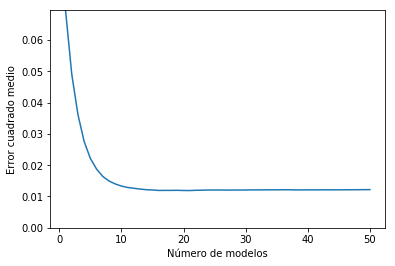

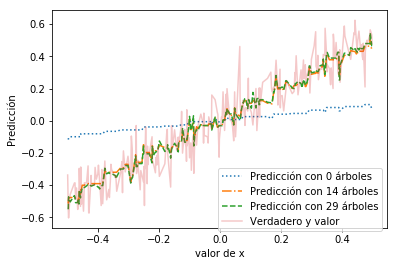

In [7]:
numTreeMax = 50
treeDepth = 5
modelList = []
predList = []
eps = 0.2

residuals = list(yTrain)

for iTrees in range(numTreeMax):
    
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrain,residuals)
    
        # Hacer pronóstico con el último modelo y añadirlo a la lista de predicciones
    latestInSamplePrediction = modelList[-1].predict(xTrain)
    
    # Usar la última predicción para actualizar residuales
    residuals = [residuals[i] - eps * latestInSamplePrediction[i] for i in range(len(residuals))]
    latestOutSamplePrediction = modelList[-1].predict(xTest)
    predList.append(list(latestOutSamplePrediction))
    
# construir la predicción acumulada para los primeros n modelos
mse = []
allPredictions = []
for iModels in range(len(modelList)):
    # agregar los primero iModelos y multiplicar por eps
    prediction = []
    for iPred in range(len(xTest)):
        prediction.append(sum([predList[i][iPred] for i in range (iModels + 1)])*eps)
        
    allPredictions.append(prediction)
    errors = [(yTest[i] - prediction[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors])/len(yTest))
    
nModels = [i + 1 for i in range(len(modelList))]

plt.plot(nModels,mse)
plt.axis("tight")
plt.xlabel("Número de modelos")
plt.ylabel("Error cuadrado medio")
plt.ylim((0.0, max(mse)))
plt.show()

plotList = [0, 14, 29]
linetype = [":","-.","--"]
plt.figure()
for i in range(len(plotList)):
    iPlot = plotList[i]
    textLegend = ("Predicción con " + str(iPlot) + " árboles")
    plt.plot(xTest,allPredictions[iPlot],label = textLegend,linestyle = linetype[i])

plt.plot(xTest, yTest, label ="Verdadero y valor", alpha = 0.25)
plt.legend(bbox_to_anchor=(1,0.3))
plt.axis("tight")
plt.xlabel("valor de x")
plt.ylabel("Predicción");